This tutorial has been taken from this [Towards Data Science blog](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

X = boston['data']
Y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(X, columns=cols)
df['Price'] = Y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Variable CRIM has the highest skew
df['CRIM'].skew()

5.223148798243851

Text(0.5, 1.0, 'Boston Housing Prices - CRIM - Original')

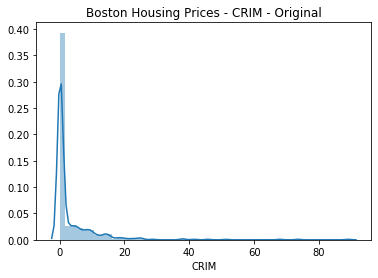

In [4]:
sns.distplot(df['CRIM']);
plt.title('Boston Housing Prices - CRIM - Original')

In [5]:
# 1. Log transform
crim_log = np.log(df['CRIM'])
crim_log.skew()

0.4059344988496048

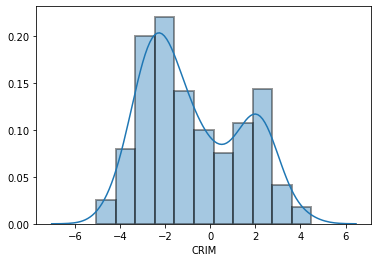

In [16]:
sns.distplot(crim_log, hist_kws=dict(edgecolor = 'k', linewidth = 2));

In [13]:
# 2. Square Root Transform
crim_sqrt = np.sqrt(df['CRIM'])
crim_sqrt.skew()

2.024382103123676

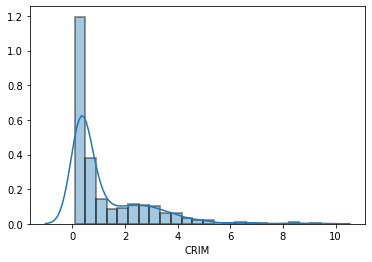

In [15]:
sns.distplot(crim_sqrt, hist_kws=dict(edgecolor = 'k', linewidth = 2))

In [20]:
# 3. Box Cox Transform
from scipy import stats

crim_boxcox = stats.boxcox(df['CRIM'])[0]
pd.Series(crim_boxcox).skew()

0.09364917268984103

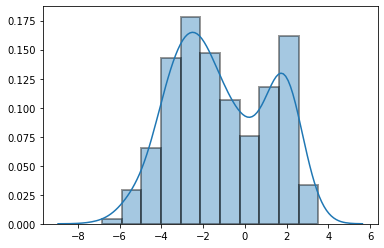

In [21]:
sns.distplot(crim_boxcox, hist_kws = dict(edgecolor = 'k', linewidth = 2))